In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

In [2]:
path = r'/Users/shaquillelee/Documents/Instacart Basket Analysis/'

In [3]:
final_data = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data','final_data.pkl'))

In [4]:
final_data['days_since_prior_order'] = final_data['days_since_prior_order'].astype('int64')


In [5]:
final_data['orders_day_of_week'] = final_data['orders_day_of_week'].astype('int64')


In [6]:
final_data['order_number'] = final_data['order_number'].astype('int64')


In [7]:
final_data['order_hour_of_day'] = final_data['order_hour_of_day'].astype('int64')


In [54]:
final_data.head(100000) 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_the_day,max_order,loyalty_flag,average_price,Spending,median_days_since_prior_order,order_regularity,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge,Region,low activity exclusion,age_group,income_level,Parent_status,department,merge2
0,2539329.0,1,1,2,8,7,196.0,1.0,0.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Regularly busy,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
1,2398795.0,1,1,3,7,15,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
2,473747.0,1,1,3,12,21,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
3,2254736.0,1,1,4,7,29,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
4,431534.0,1,1,4,15,28,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2752077.0,17561,17561,3,17,30,7826.0,4.0,1.0,Butter Pound Cake,8.0,3,13.8,Mid-range Products,Regularly busy,Slowest days,Most Orders,13.0,Regular Customer,6.780952,Low Spender,27.0,Non-frequent customer,Kenneth,Herrera,Male,Kansas,69.0,1/27/2018,3.0,married,50417.0,both,Midwest,Keep,Seniors,Middle income,Senior Parents,bakery,both
99996,380501.0,17605,17605,4,9,30,196.0,12.0,0.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,15.0,Regular Customer,6.725641,Low Spender,17.0,Regular customer,Gerald,Krueger,Male,Florida,61.0,4/17/2017,1.0,married,43782.0,both,South,Keep,Elderly,Low income,Elderly Parents,beverages,both
99997,62424.0,17605,17605,6,13,30,24852.0,6.0,0.0,Banana,24.0,4,12.3,Mid-range Products,Regularly busy,Regularly busy,Most Orders,15.0,Regular Customer,6.725641,Low Spender,17.0,Regular customer,Gerald,Krueger,Male,Florida,61.0,4/17/2017,1.0,married,43782.0,both,South,Keep,Elderly,Low income,Elderly Parents,produce,both
99998,3194584.0,17605,17605,6,9,15,5322.0,12.0,0.0,Gluten Free Dark Chocolate Chunk Chewy with a ...,3.0,19,2.9,Low-range products,Regularly busy,Regularly busy,Most Orders,15.0,Regular Customer,6.725641,Low Spender,17.0,Regular customer,Gerald,Krueger,Male,Florida,61.0,4/17/2017,1.0,married,43782.0,both,South,Keep,Elderly,Low income,Elderly Parents,snacks,both


In [53]:

pd.set_option('display.max_columns', None)

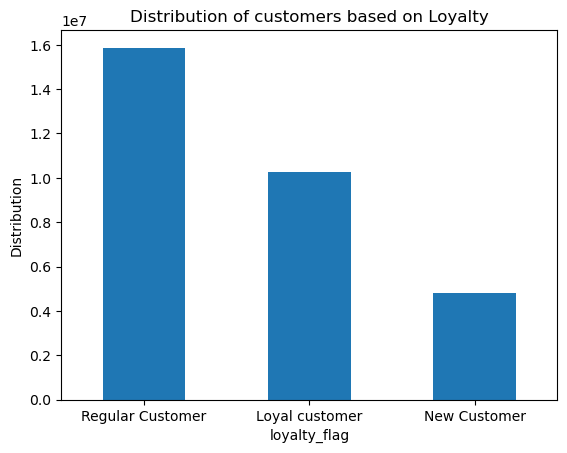

In [10]:
# Distribution of Customers based on Loyalty 
loyalty_dis = final_data['loyalty_flag'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.title('Distribution of customers based on Loyalty')
plt.ylabel('Distribution')
loyalty_dis.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_dis.png'))

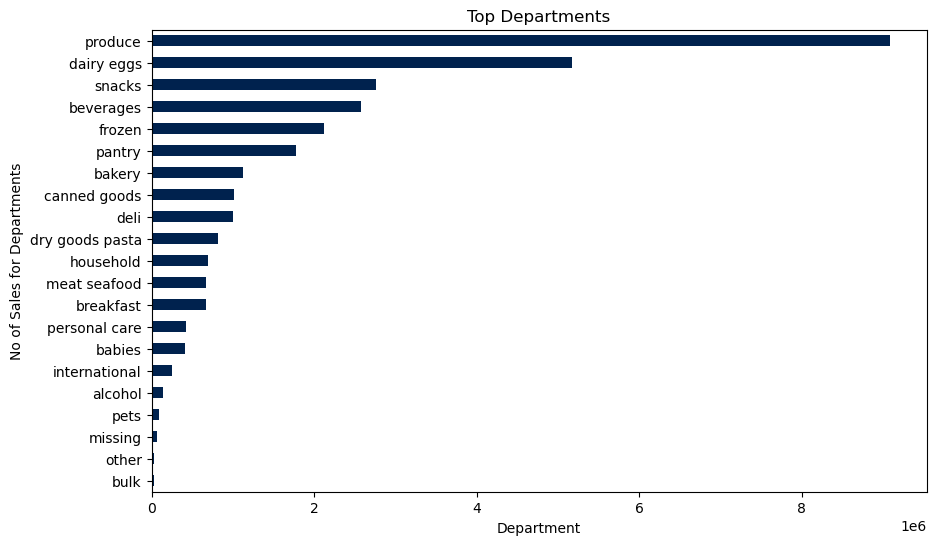

In [11]:
department_hist = plt.figure(figsize=(10, 6))
final_data['department'].value_counts().sort_values(ascending = True).plot(kind='barh', cmap ='cividis')
plt.title('Top Departments')
plt.xlabel('Department')
plt.ylabel('No of Sales for Departments')
department_hist.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'department_hist.png'))

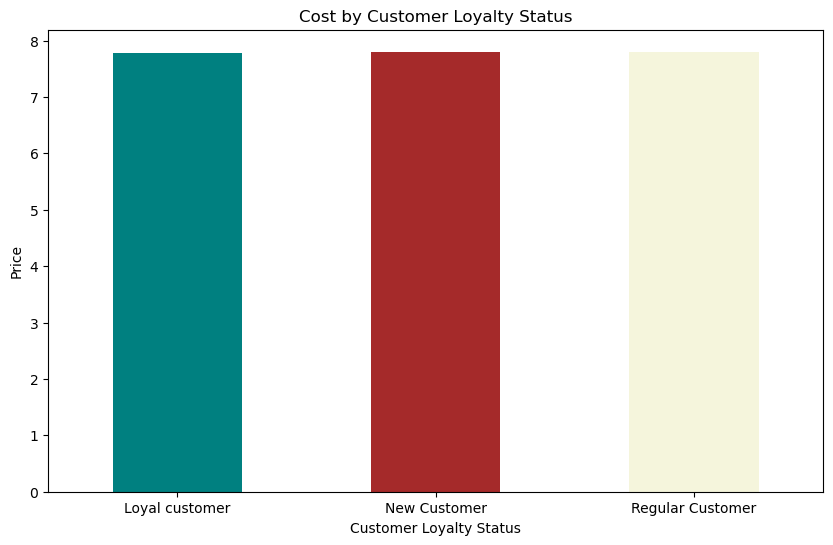

In [12]:
# Calculate the average price by customer loyalty status
avg_price_by_loyalty = final_data.groupby('loyalty_flag')['prices'].mean()

# Plot histogram
avg_price = plt.figure(figsize=(10, 6))
avg_price_by_loyalty.plot(kind='bar', color=['teal','brown', 'beige'])
plt.title('Cost by Customer Loyalty Status')
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Price')
plt.xticks(rotation=0)
#Export
avg_price.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'avg_price.png'))

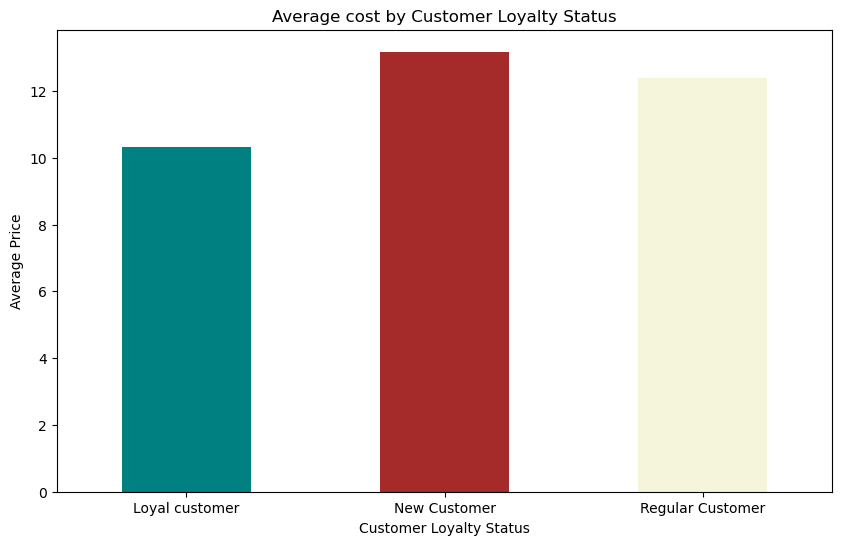

In [13]:
# Calculate the average price by customer loyalty status
avg_prices_by_loyalty = final_data.groupby('loyalty_flag')['average_price'].mean()

# Plot histogram
avg_prices = plt.figure(figsize=(10, 6))
avg_prices_by_loyalty.plot(kind='bar', color=['teal','brown', 'beige'])
plt.title('Average cost by Customer Loyalty Status')
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
#Export
avg_prices.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'avg_prices.png'))

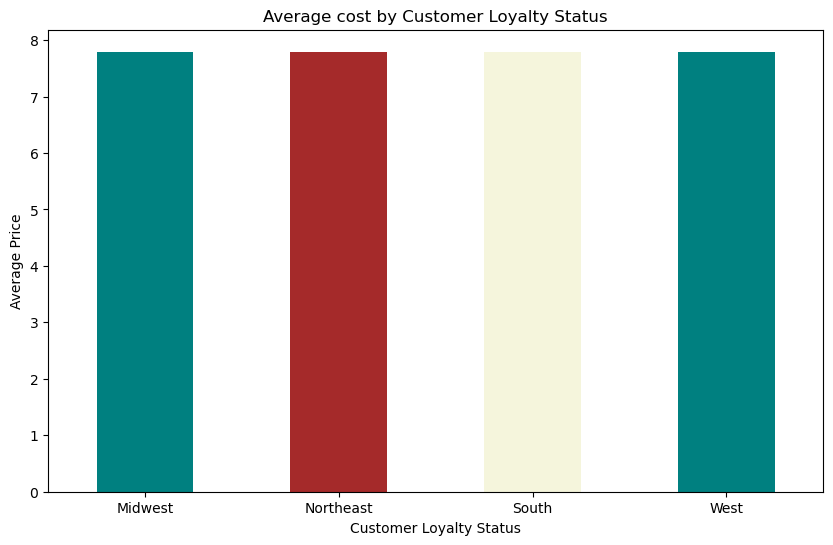

In [14]:
Ordering_habit_region = final_data.groupby('Region')['prices'].mean()
# Plot histogram
order_habit = plt.figure(figsize=(10, 6))
Ordering_habit_region.plot(kind='bar', color=['teal','brown', 'beige'])
plt.title('Average cost by Customer Loyalty Status')
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
#Export
order_habit.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'Ordering_habit_region.png'))

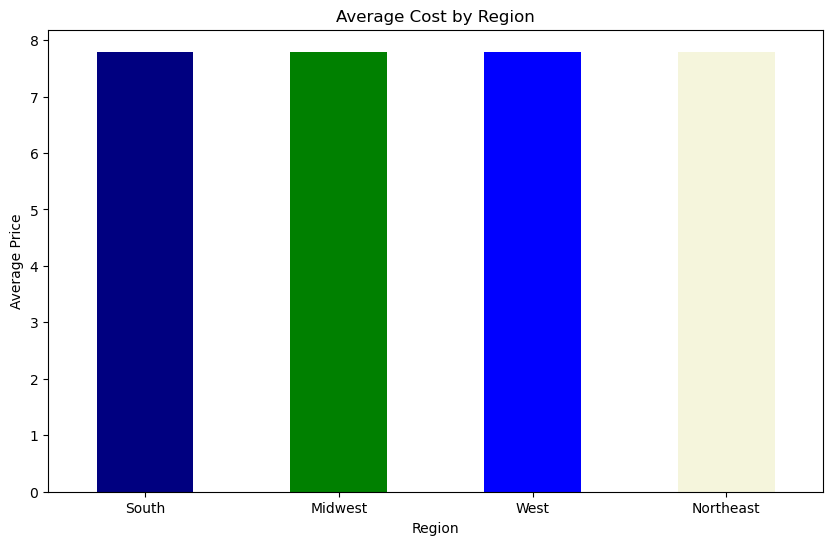

In [15]:
# Calculate the average price by Region
avg_cost_by_region = final_data.groupby('Region')['prices'].mean().sort_values(ascending=False)

# Plot bar chart
avg_cost = plt.figure(figsize=(10, 6))
avg_cost_by_region.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Average Cost by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()
#Export
avg_cost.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'avg_cost_by_region.png'))

In [52]:
avg_cost_by_region

Region
South        7.794406
Midwest      7.792284
West         7.790273
Northeast    7.781419
Name: prices, dtype: float64

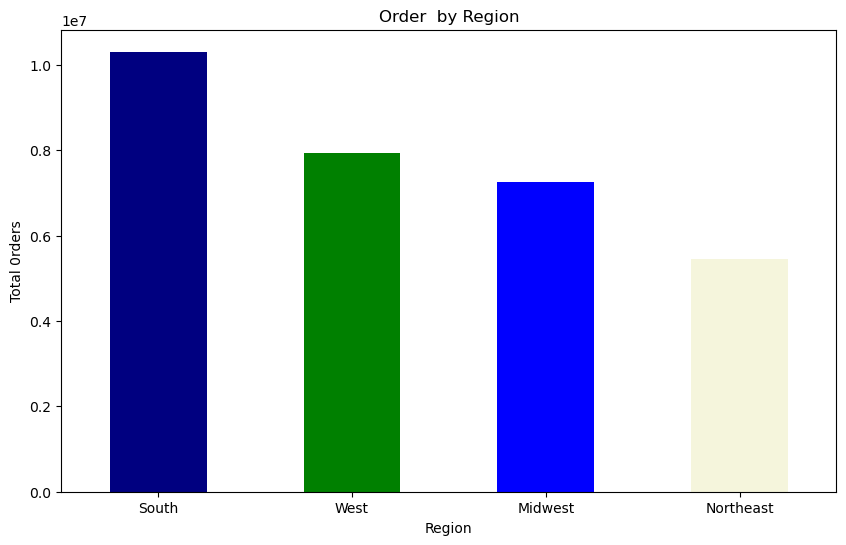

In [16]:
# Calculate the Total Order by Region
avg_order_by_region = final_data.groupby('Region')['order_number'].count().sort_values(ascending=False)

# Plot bar chart
order_by_region = plt.figure(figsize=(10, 6))
avg_order_by_region.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order  by Region')
plt.xlabel('Region')
plt.ylabel('Total 0rders')
plt.xticks(rotation=0)
plt.show()
#Export
order_by_region.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'Order_by_region.png'))

In [51]:
avg_order_by_region.head()

Region
South        10309834
West          7926343
Midwest       7260556
Northeast     5464076
Name: order_number, dtype: int64

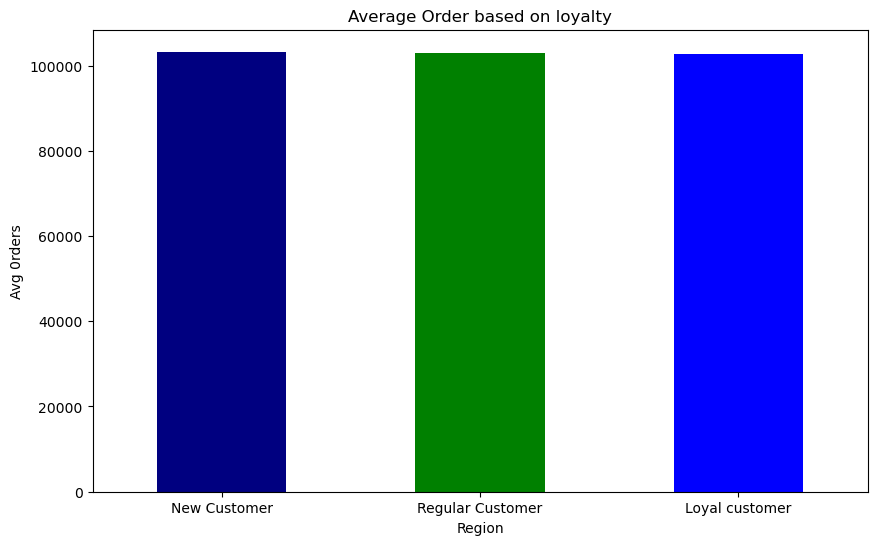

In [17]:
# Calculate the Total Order by Region
customer_order = final_data.groupby('loyalty_flag')['order_number'].mean().sort_values(ascending=False)

# Plot bar chart
avg_customer_order = plt.figure(figsize=(10, 6))
customer_order.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Average Order based on loyalty')
plt.xlabel('Region')
plt.ylabel('Avg 0rders')
plt.xticks(rotation=0)
plt.show()

avg_customer_order.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'avg_customer_order.png'))

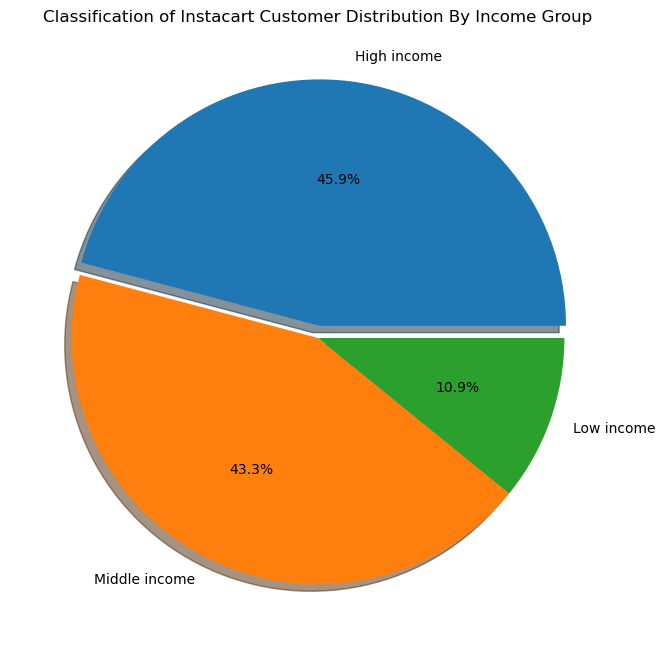

In [18]:
pie = final_data['income_level'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.05,0.0,0.0], shadow=True, figsize=(8,8))
plt.title('Classification of Instacart Customer Distribution By Income Group')
plt.ylabel('') 
#Save Figure
pie.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'pie_of_income.png'))

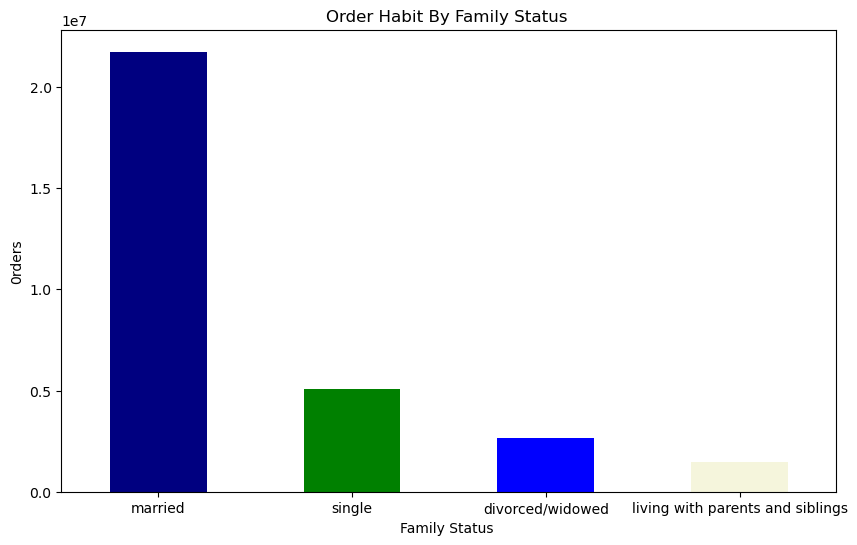

In [19]:
# Calculate the Total Order by Region
family_status = final_data.groupby('martial_status')['order_number'].count().sort_values(ascending=False)

# Plot bar chart
family_status_ord = plt.figure(figsize=(10, 6))
family_status.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order Habit By Family Status ')
plt.xlabel('Family Status ')
plt.ylabel('0rders')
plt.xticks(rotation=0)
plt.show()
#Save Figure
family_status_ord.figure.savefig(os.path.join(path,'Analysis','Visualizations','family_status.png'))


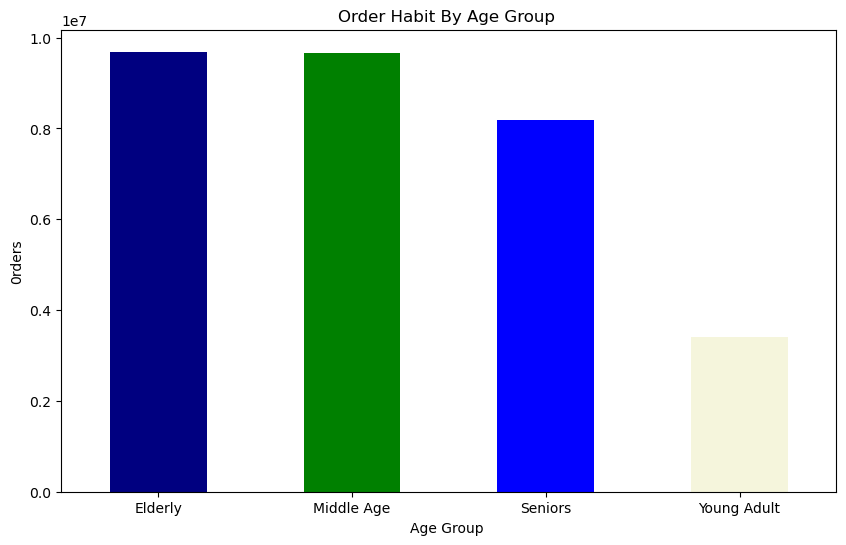

In [20]:

# Calculate the Total Order by Region
age_group_ord = final_data.groupby('age_group')['order_number'].count().sort_values(ascending=False)

# Plot bar chart
age_group = plt.figure(figsize=(10, 6))
age_group_ord.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order Habit By Age Group ')
plt.xlabel('Age Group ')
plt.ylabel('0rders')
plt.xticks(rotation=0)
plt.show()
#Save Figure
age_group.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_group_ord.png'))


7.. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

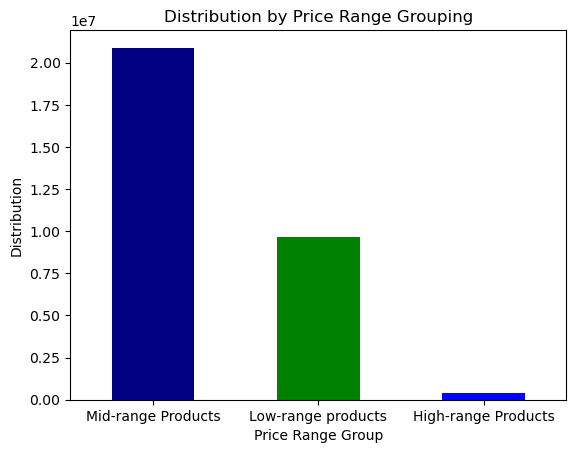

In [21]:
#Calculate by Price Range 
price_range = final_data['price_range_loc'].value_counts().plot.bar(color = ['navy', 'green', 'blue'] )
plt.xticks(rotation=360)
plt.title('Distribution by Price Range Grouping')
plt.ylabel('Distribution')
plt.xlabel('Price Range Group')     
# Save fig
#Save Figure
price_range.figure.savefig(os.path.join(path,'Analysis','Visualizations','price_range_group.png'))


Text(0, 0.5, 'No of Sales for Departments')

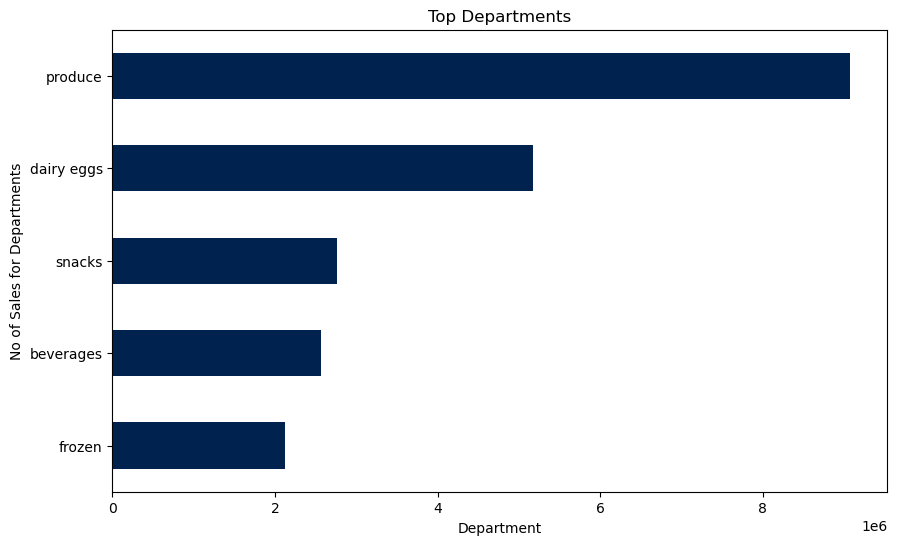

In [22]:
departments_hist = plt.figure(figsize=(10, 6))
final_data['department'].value_counts().head(5).sort_values(ascending = True).plot(kind='barh', cmap ='cividis')
plt.title('Top Departments')
plt.xlabel('Department')
plt.ylabel('No of Sales for Departments')

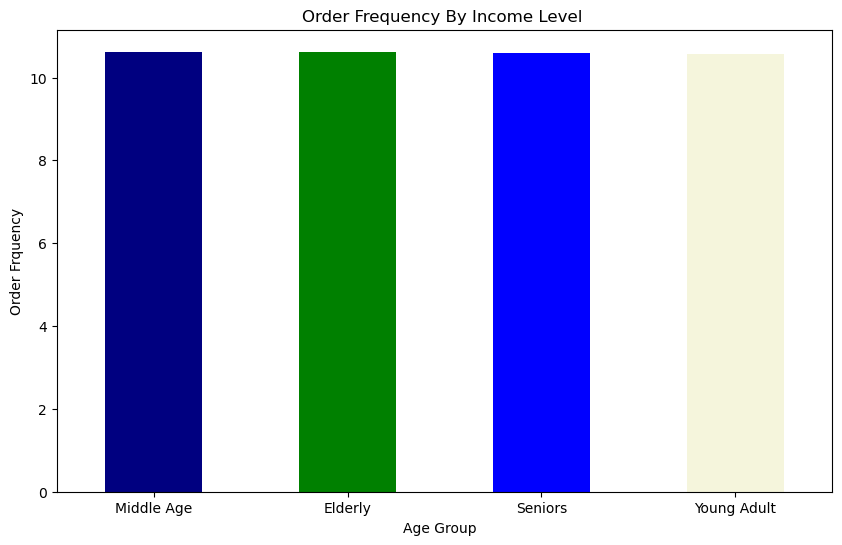

In [23]:
# Calculate the Order Frequency by age grooup 
days_since_order_age = final_data.groupby('age_group')['days_since_prior_order'].mean().sort_values(ascending=False)

# Plot bar chart
order_freq_age = plt.figure(figsize=(10, 6))
days_since_order_age.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order Frequency By Income Level ')
plt.xlabel('Age Group  ')
plt.ylabel('Order Frquency')
plt.xticks(rotation=0)
plt.show()


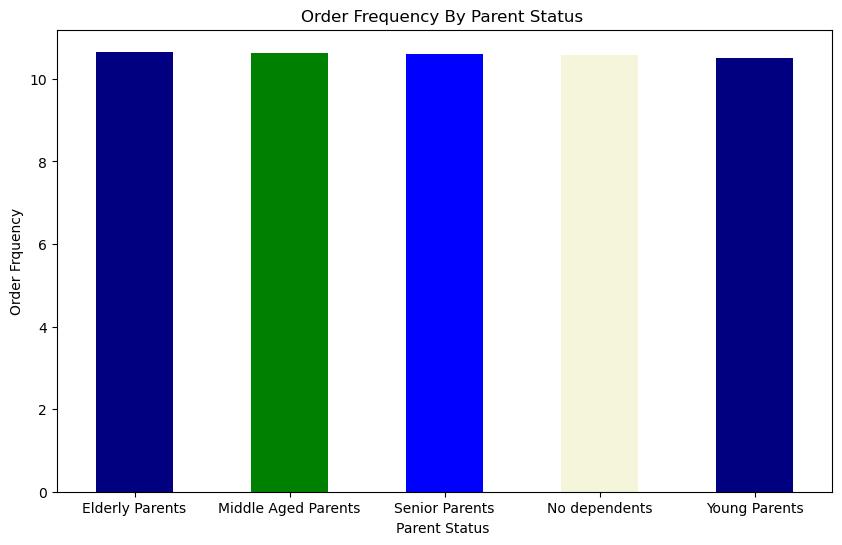

In [24]:
# Group parent status with the days since prior order to. check how. frequent customers with dependants (children) reorder
days_since_order = final_data.groupby('Parent_status')['days_since_prior_order'].mean().sort_values(ascending=False)

# Plot bar chart
order_freq = plt.figure(figsize=(10, 6))
days_since_order.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order Frequency By Parent Status ')
plt.xlabel('Parent Status ')
plt.ylabel('Order Frquency')
plt.xticks(rotation=0)
plt.show()

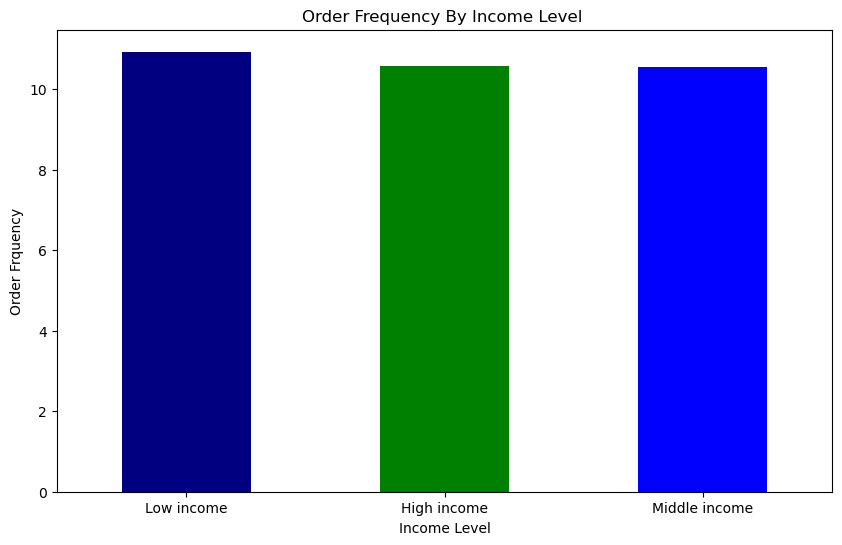

In [25]:
#Calculate the Order Frequency by income level
days_since_order_income = final_data.groupby('income_level')['days_since_prior_order'].mean().sort_values(ascending=False)

# Plot bar chart
order_freq_income = plt.figure(figsize=(10, 6))
days_since_order_income.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order Frequency By Income Level ')
plt.xlabel('Income Level')
plt.ylabel('Order Frquency')
plt.xticks(rotation=0)
plt.show()
#save
order_freq_income.figure.savefig(os.path.join(path,'Analysis','Visualizations','order_freq_by_income.png'))


In [26]:
final_data['days_since_prior_order'].describe()

count    3.096081e+07
mean     1.060577e+01
std      8.389280e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [27]:
final_data.groupby('age_group').agg({'days_since_prior_order': ['mean','count','median',]})

days_since_prior_order                
                              mean    count median
age_group                                         
Elderly                  10.619949  9688815    7.0
Middle Age               10.622704  9662740    7.0
Seniors                  10.587678  8194529    7.0
Young Adult              10.561043  3414725    7.0

In [28]:
final_data.groupby('product_name')


In [29]:
final_data.groupby('income_level').agg({'product_name': ['count']})


,product_name
,count
income_level,
High income,14202902
Low income,3362683
Middle income,13395224


product_name
Banana                    50740
Bag of Organic Bananas    40447
Organic Strawberries      28134
Organic Baby Spinach      25386
Organic Hass Avocado      22036
Name: count, dtype: int64


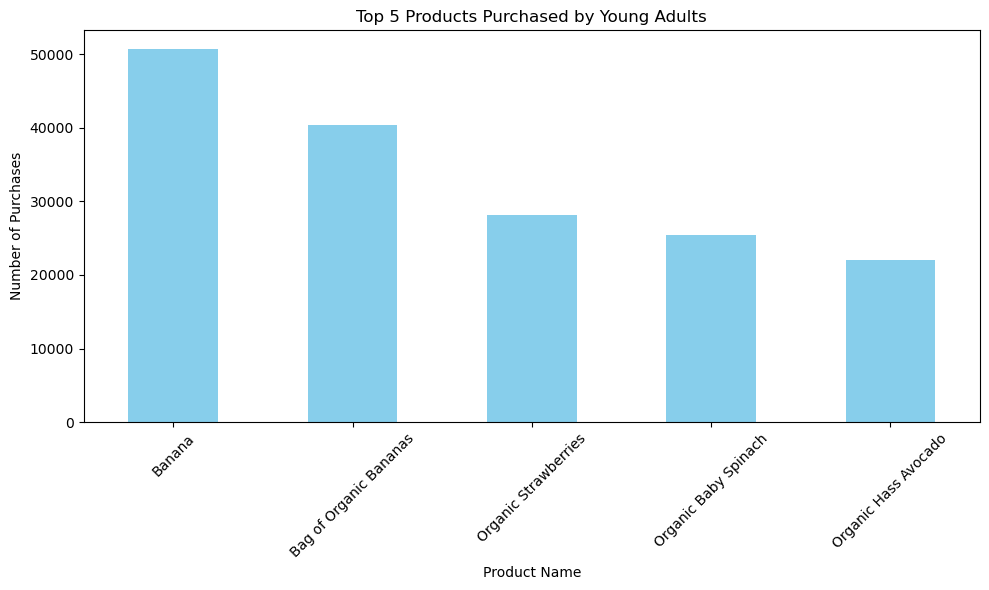

In [30]:
# Filter for young adults
young_adults_data = final_data[final_data['age_group'] == 'Young Adult']

# Calculate the top 5 products purchased by young adults
top_5_products = young_adults_data['product_name'].value_counts().head(5)

# Print the results
print(top_5_products)

# Visualize the top 5 products
top_5_young =plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products Purchased by Young Adults')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure (optional)
top_5_young.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_5_products_young_adult.png'))

plt.show()



product_name
Banana                    50740
Bag of Organic Bananas    40447
Organic Strawberries      28134
Organic Baby Spinach      25386
Organic Hass Avocado      22036
Name: count, dtype: int64


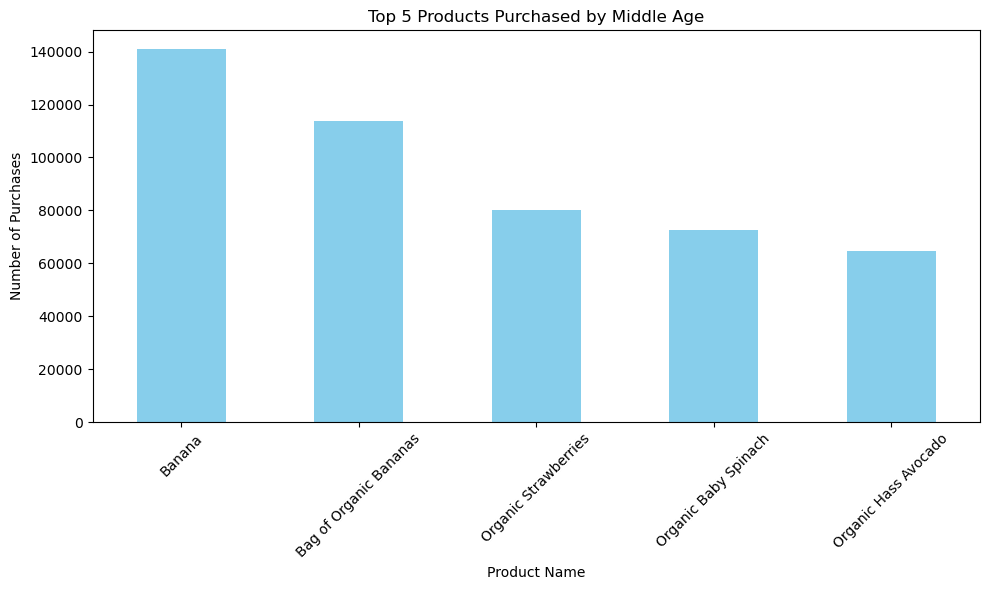

In [31]:
# Filter for young adults
middle_age_data = final_data[final_data['age_group'] == 'Middle Age']

# Calculate the top 5 products purchased by young adults
top_5_products_mid = middle_age_data['product_name'].value_counts().head(5)

# Print the results
print(top_5_products)

# Visualize the top 5 products
top_5_mid = plt.figure(figsize=(10, 6))
top_5_products_mid.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products Purchased by Middle Age')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Save the figure
top_5_mid.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_5_products_middle_age.png'))




product_name
Banana                    119111
Bag of Organic Bananas     97717
Organic Strawberries       68184
Organic Baby Spinach       60861
Organic Hass Avocado       55124
Name: count, dtype: int64


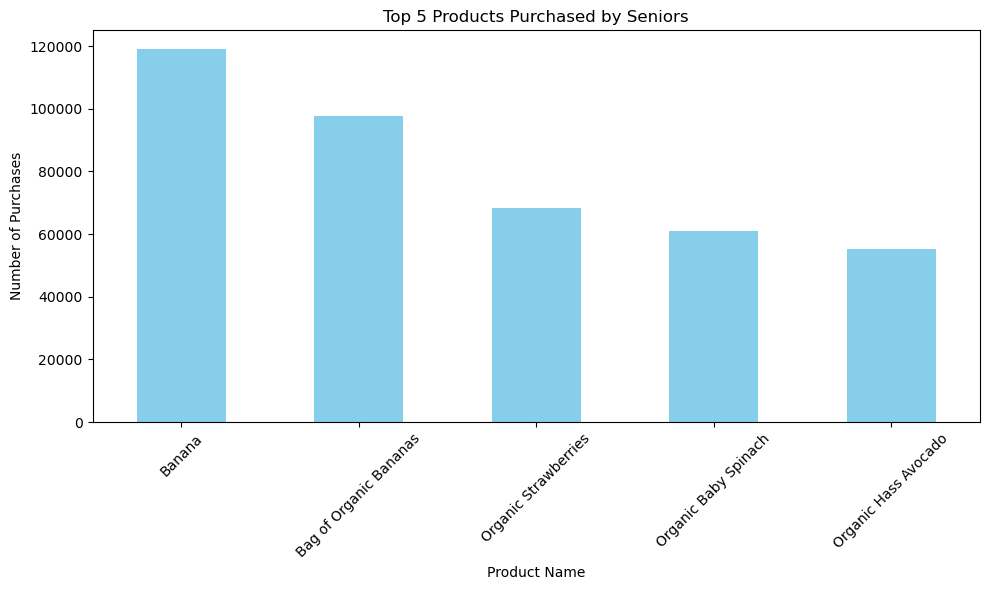

In [32]:
# Filter for young adults
senior_data = final_data[final_data['age_group'] == 'Seniors']

# Calculate the top 5 products purchased by young adults
top_5_products = senior_data['product_name'].value_counts().head(5)

# Print the results
print(top_5_products)

# Visualize the top 5 products
top_5_sen = plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products Purchased by Seniors')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure (optional)
top_5_sen.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_5_products_Sen.png'))

plt.show()

product_name
Banana                    142325
Bag of Organic Bananas    114534
Organic Strawberries       79376
Organic Baby Spinach       72787
Organic Hass Avocado       64944
Name: count, dtype: int64


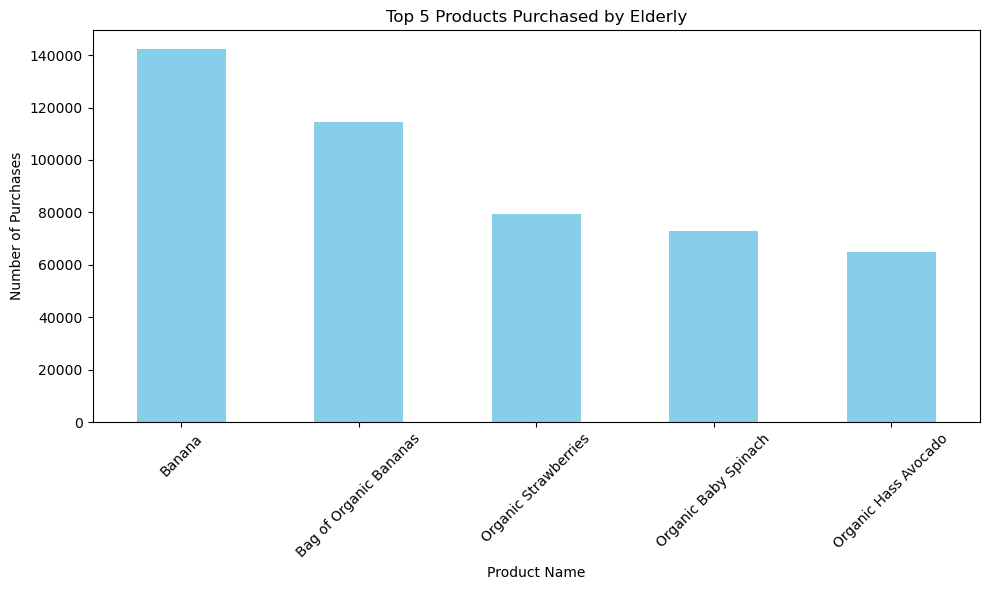

In [33]:
# Filter for young adults
elderly_data = final_data[final_data['age_group'] == 'Elderly']

# Calculate the top 5 products purchased by young adults
top_5_products = elderly_data['product_name'].value_counts().head(5)

# Print the results
print(top_5_products)

# Visualize the top 5 products
top_5_eld = plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products Purchased by Elderly')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure (optional)
top_5_eld.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_5_products_elderly.png'))

plt.show()

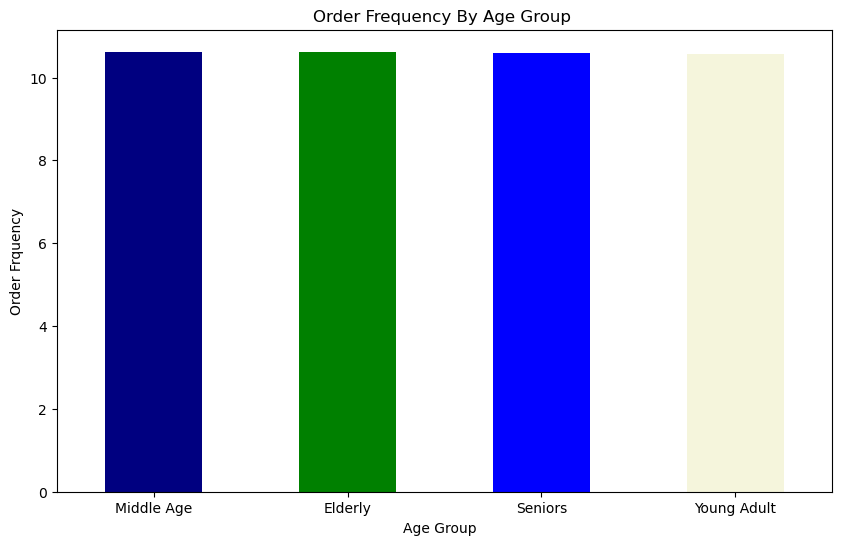

In [34]:
#Calculate the Order Frequency by income level
order_freq_age = final_data.groupby('age_group')['days_since_prior_order'].mean().sort_values(ascending=False)

# Plot bar chart
age_freq = plt.figure(figsize=(10, 6))
order_freq_age.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order Frequency By Age Group ')
plt.xlabel('Age Group  ')
plt.ylabel('Order Frquency')
plt.xticks(rotation=0)
plt.show()
#Save
age_freq.figure.savefig(os.path.join(path,'Analysis','Visualizations','order_freq_age.png'))


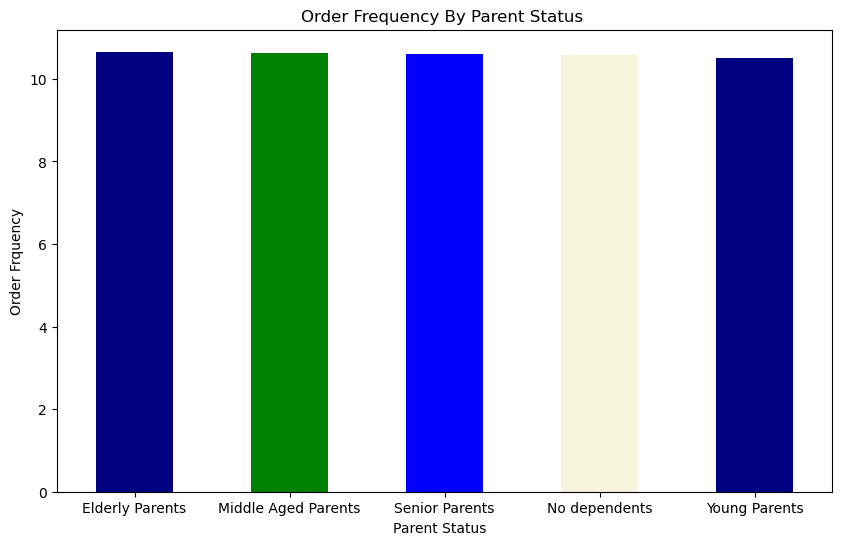

In [35]:
#Calculate the Order Frequency by income level
order_freq_parent  = final_data.groupby('Parent_status')['days_since_prior_order'].mean().sort_values(ascending=False)

# Plot bar chart
parent_freq = plt.figure(figsize=(10, 6))
order_freq_parent.plot(kind='bar', color=['navy', 'green', 'blue', 'beige'])
plt.title('Order Frequency By Parent Status ')
plt.xlabel('Parent Status  ')
plt.ylabel('Order Frquency')
plt.xticks(rotation=0)
plt.show()
#Save
parent_freq.figure.savefig(os.path.join(path,'Analysis','Visualizations','parent_order_freq_age.png'))


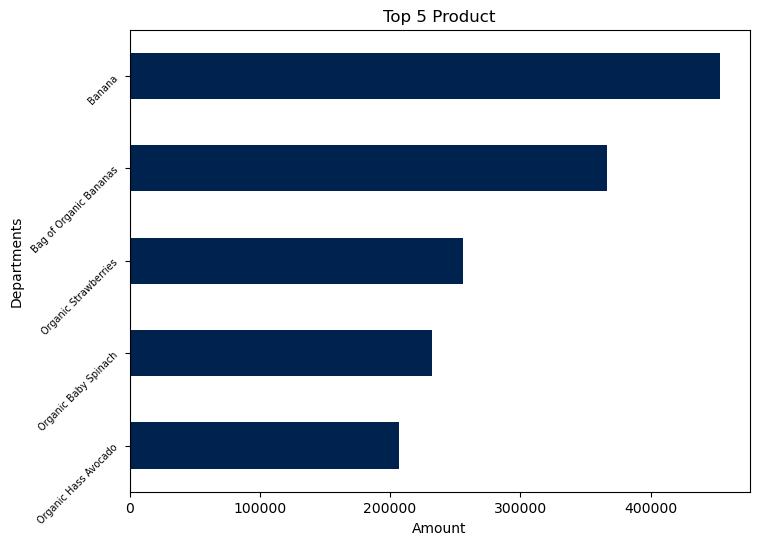

In [49]:
department_hist = plt.figure(figsize=(8, 6))
top_5 = final_data['product_name'].value_counts().head(5).sort_values(ascending = True).plot(kind='barh', cmap ='cividis')
plt.title('Top 5 Product')
plt.xlabel('Amount')
plt.ylabel('Departments')
plt.yticks(rotation=45, fontsize = 7)

#Save
top_5.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_5_products.png'))
